In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

import scipy
import pylab
import math
import random

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors


%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel('Выборка_ектб.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,15.555977,5700000,6000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,14.557448,2100000,2200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,8466_авито,1,авито,15.659230,6320000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,переуступка,NaN,ЖК «Ботаника LIFE»,NaN,другое,Сдан 4 кв. 2023,NaN
13332,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13333,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13334,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[df['Мусор'] == 0]
df = df[df['Выбросы'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Многоуровневость'] == 0]
df = df[df['Терраса'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_этажи,0,этажи,15.483217,5300000,0,6.115291e+06,6.056768e+06,-756768.110306,-0.142786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7_этажи,0,этажи,15.679591,6450000,6490000,6.246966e+06,6.173033e+06,276967.222331,0.042941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15_этажи,0,этажи,15.823725,7450000,7500000,7.502204e+06,7.472315e+06,-22315.213466,-0.002995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,8464_авито,0,авито,15.293700,4385000,0,5.291969e+06,5.297718e+06,-912718.329665,-0.208146,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
7886,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7887,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7888,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
list(df.columns)

['ID',
 'Мусор',
 'Агрегатор',
 'LN(Цена)',
 'Цена',
 'Цена_перв',
 'Прогноз_1',
 'Прогноз_2',
 'MAE',
 'MAPE',
 'Цена(кв.м)_пр',
 'Анализ',
 'Исп',
 'Комм',
 'Цена(кв.м)',
 'Выбросы',
 'Выбросы_1',
 'Исп.1',
 'Комм.1',
 'Выбросы_2',
 'Исп.2',
 'Комм.2',
 'IsolationForest',
 'pca',
 'COPOD',
 'dup_all',
 'dup_1',
 'dup_2',
 'Пересечения',
 'dup(<=0.03)',
 'Пересечения(<=0.03)',
 'Пересечения(>0.03)',
 'dup_res',
 'ОПлощадь',
 'Оплощадь_перв',
 'Комнатность',
 'Комнатность_перв',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этаж/Этажность',
 'Этажность_1',
 'Этажность_2',
 'Неточности',
 'Переменная этажность',
 'Р',
 'Р%',
 'Минжкх',
 'П',
 'Правдом',
 'П.1',
 'Этажность_перв',
 'ГП',
 'Неточности.1',
 'Р.1',
 'Минжкх.1',
 'Правдом.1',
 'Год постройки',
 'Аварийные',
 'Исп.3',
 'Ремонт_1',
 'Ремонт_перв',
 'Санузел',
 'Стены_1',
 'Стены_перв',
 'Адрес_перв',
 'Адрес',
 'Проверка номера дома',
 'Дом',
 'Дом_Ya',
 'Проверка',
 'Адрес_yandex',
 'Долгота',
 'Широта',
 'Сцепка_к',
 'Сцепка

In [20]:
df_sample = df[[
                'ОПлощадь',
                'Этаж_1',
                'ГП',
                'Районы_2',
                'Сцепка_к',
                'ЖК_БД',
                'Адрес_yandex'
              ]]
df_sample

,ОПлощадь,Этаж_1,ГП,Районы_2,Сцепка_к,ЖК_БД,Адрес_yandex
0,70.30,3,2009.0,Академический,60.514731 56.810482,нет,"Россия, Свердловская область, Екатеринбург, ул..."
1,40.40,4,1960.0,Центральный,60.636515 56.826183,нет,"Россия, Свердловская область, Екатеринбург, ул..."
2,42.42,14,2012.0,Пионерский,60.648157 56.864782,нет,"Россия, Свердловская область, Екатеринбург, Бо..."
3,56.80,4,2014.0,Уктус,60.681647 56.782174,нет,"Россия, Свердловская область, Екатеринбург, Ал..."
4,44.20,6,2016.0,Южный,60.616276 56.804894,нет,"Россия, Свердловская область, Екатеринбург, ул..."
...,...,...,...,...,...,...,...
7885,31.00,13,2017.0,Юго_Западный,60.572447 56.81096,нет,"Россия, Свердловская область, Екатеринбург, ул..."
7886,38.10,9,1994.0,Уктус,60.649271 56.795727,нет,"Россия, Свердловская область, Екатеринбург, Пр..."
7887,32.40,9,1994.0,Уктус,60.649271 56.795727,нет,"Россия, Свердловская область, Екатеринбург, Пр..."
7888,32.80,6,1994.0,Уктус,60.649271 56.795727,нет,"Россия, Свердловская область, Екатеринбург, Пр..."


In [21]:
le = LabelEncoder()
df_sample['Районы_2_enc'] = le.fit_transform(df_sample['Районы_2'])
df_sample['ЖК_БД_enc'] = le.fit_transform(df_sample['ЖК_БД'])

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
lats = []
lons = []

for i in range(len(df_sample['Сцепка_к'])):
    lat = df_sample['Сцепка_к'][i].split(' ')[0]
    lon = df_sample['Сцепка_к'][i].split(' ')[1]
            
    lats.append(lat)
    lons.append(lon)
    
df_sample['lat'] = [float(i) for i in lats]
df_sample['lon'] = [float(i) for i in lons]

/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [23]:
df_sample = df_sample.drop(['Районы_2', 'Сцепка_к', 'ЖК_БД'], axis = 1)
df_sample

,ОПлощадь,Этаж_1,ГП,Адрес_yandex,Районы_2_enc,ЖК_БД_enc,lat,lon
0,70.30,3,2009.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.514731,56.810482
1,40.40,4,1960.0,"Россия, Свердловская область, Екатеринбург, ул...",27,0,60.636515,56.826183
2,42.42,14,2012.0,"Россия, Свердловская область, Екатеринбург, Бо...",19,0,60.648157,56.864782
3,56.80,4,2014.0,"Россия, Свердловская область, Екатеринбург, Ал...",23,0,60.681647,56.782174
4,44.20,6,2016.0,"Россия, Свердловская область, Екатеринбург, ул...",32,0,60.616276,56.804894
...,...,...,...,...,...,...,...,...
7885,31.00,13,2017.0,"Россия, Свердловская область, Екатеринбург, ул...",31,0,60.572447,56.810960
7886,38.10,9,1994.0,"Россия, Свердловская область, Екатеринбург, Пр...",23,0,60.649271,56.795727
7887,32.40,9,1994.0,"Россия, Свердловская область, Екатеринбург, Пр...",23,0,60.649271,56.795727
7888,32.80,6,1994.0,"Россия, Свердловская область, Екатеринбург, Пр...",23,0,60.649271,56.795727


In [24]:
df_sim = df_sample[[
                    'ОПлощадь',
                    'Этаж_1',
                    'ГП',
                    'Районы_2_enc',
                    'ЖК_БД_enc',
                    'lat',
                    'lon'
                  ]]
df_sim

,ОПлощадь,Этаж_1,ГП,Районы_2_enc,ЖК_БД_enc,lat,lon
0,70.30,3,2009.0,0,0,60.514731,56.810482
1,40.40,4,1960.0,27,0,60.636515,56.826183
2,42.42,14,2012.0,19,0,60.648157,56.864782
3,56.80,4,2014.0,23,0,60.681647,56.782174
4,44.20,6,2016.0,32,0,60.616276,56.804894
...,...,...,...,...,...,...,...
7885,31.00,13,2017.0,31,0,60.572447,56.810960
7886,38.10,9,1994.0,23,0,60.649271,56.795727
7887,32.40,9,1994.0,23,0,60.649271,56.795727
7888,32.80,6,1994.0,23,0,60.649271,56.795727


In [25]:
scaler = StandardScaler()
df_sim_scale = scaler.fit_transform(df_sim)
df_sim_scale

array([[ 0.6804979 , -0.73775129,  0.41580619, ..., -0.1483782 ,
        -1.31993082, -0.29484114],
       [-0.55050513, -0.5784939 , -1.67262406, ..., -0.1483782 ,
         0.58921762,  0.06657505],
       [-0.46734038,  1.01408002,  0.54366926, ..., -0.1483782 ,
         0.77172358,  0.95507283],
       ...,
       [-0.87987049,  0.21779306, -0.2235092 , ..., -0.1483782 ,
         0.78918722, -0.63448167],
       [-0.86340222, -0.25997911, -0.2235092 , ..., -0.1483782 ,
         0.78918722, -0.63448167],
       [-0.5669734 , -0.10072172, -0.2235092 , ..., -0.1483782 ,
         0.78918722, -0.63448167]])

# Cosine_similarity

In [63]:
from sklearn.metrics.pairwise import haversine_distances

def calculate_distance(lat1, lon1, lat2, lon2):
    # Преобразуем градусы в радианы
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # Создаем массив для координат
    coords_1 = np.array([[lat1_rad, lon1_rad]])
    coords_2 = np.array([[lat2_rad, lon2_rad]])
    
    # Вычисляем расстояние
    return haversine_distances(coords_1, coords_2) * 6371000  # Умножаем на радиус Земли в метрах

In [54]:
# Задаем порог схожести
similarity_threshold = 0.98

# Вычисление косинусной схожести с помощью векторизованных вычислений
cosine_similarities = cosine_similarity(df_sim_scale)
# Обнуление главной диагонали матрицы схожести
np.fill_diagonal(cosine_similarities, 0)

# Фильтрация по порогу
similar_objects = []

for i, row in enumerate(cosine_similarities):
    similar_indices = np.where(row >= similarity_threshold)[0].tolist()
    similar_objects.append(similar_indices)

df_sample['similar_objects'] = similar_objects

In [55]:
df_sample

,ОПлощадь,Этаж_1,ГП,Адрес_yandex,Районы_2_enc,ЖК_БД_enc,lat,lon,similar_objects
0,70.30,3,2009.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.514731,56.810482,"[950, 1142, 1386, 2259, 3109, 3391, 4968]"
1,40.40,4,1960.0,"Россия, Свердловская область, Екатеринбург, ул...",27,0,60.636515,56.826183,"[941, 4211, 4617, 4921, 5000, 5029, 5277, 5547..."
2,42.42,14,2012.0,"Россия, Свердловская область, Екатеринбург, Бо...",19,0,60.648157,56.864782,"[3585, 6287]"
3,56.80,4,2014.0,"Россия, Свердловская область, Екатеринбург, Ал...",23,0,60.681647,56.782174,"[4904, 6203, 6376, 6629, 6690, 6967]"
4,44.20,6,2016.0,"Россия, Свердловская область, Екатеринбург, ул...",32,0,60.616276,56.804894,"[317, 715, 839, 1912, 2026, 2705, 2786, 3730, ..."
...,...,...,...,...,...,...,...,...,...
7885,31.00,13,2017.0,"Россия, Свердловская область, Екатеринбург, ул...",31,0,60.572447,56.810960,"[1693, 7311]"
7886,38.10,9,1994.0,"Россия, Свердловская область, Екатеринбург, Пр...",23,0,60.649271,56.795727,[7887]
7887,32.40,9,1994.0,"Россия, Свердловская область, Екатеринбург, Пр...",23,0,60.649271,56.795727,[7886]
7888,32.80,6,1994.0,"Россия, Свердловская область, Екатеринбург, Пр...",23,0,60.649271,56.795727,[]


In [56]:
df_sample.loc[0:0]
print(df_sample.loc[0:0]['Адрес_yandex'].values)

['Россия, Свердловская область, Екатеринбург, улица Соболева, 19']


In [57]:
sim = df_sample.iloc[np.array(df_sample['similar_objects'][0])]
sim

,ОПлощадь,Этаж_1,ГП,Адрес_yandex,Районы_2_enc,ЖК_БД_enc,lat,lon,similar_objects
950,65.0,2,2013.0,"Россия, Свердловская область, Екатеринбург, ми...",0,0,60.513617,56.805417,"[0, 634, 635, 703, 883, 981, 1142, 1183, 1663,..."
1142,65.0,3,2011.0,"Россия, Свердловская область, Екатеринбург, Ух...",4,0,60.545857,56.818267,"[0, 950, 1386, 3600, 4298, 4968]"
1386,68.9,3,2006.0,"Россия, Свердловская область, Екатеринбург, ул...",4,0,60.545291,56.819868,"[0, 875, 995, 1142, 3600, 4968]"
2259,75.0,2,2014.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.521046,56.799039,"[0, 554, 634, 950, 1823, 2083, 2208, 2269, 284..."
3109,84.4,2,2010.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.501265,56.808659,"[0, 452, 995, 1823, 2208, 2259, 2269, 3569, 37..."
3391,72.0,4,2014.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.518378,56.799064,"[0, 548, 634, 821, 950, 981, 1289, 1823, 1911,..."
4968,74.0,2,2013.0,"Россия, Свердловская область, Екатеринбург, ми...",0,0,60.512988,56.804204,"[0, 634, 883, 950, 995, 1142, 1386, 1663, 1823..."


In [58]:
sim['Адрес_yandex'].values

array(['Россия, Свердловская область, Екатеринбург, микрорайон Широкая Речка, улица Анатолия Муранова, 12',
       'Россия, Свердловская область, Екатеринбург, Ухтомская улица, 41',
       'Россия, Свердловская область, Екатеринбург, улица Репина, 78',
       'Россия, Свердловская область, Екатеринбург, улица Очеретина, 7',
       'Россия, Свердловская область, Екатеринбург, улица Соболева, 10А',
       'Россия, Свердловская область, Екатеринбург, улица Очеретина, 12',
       'Россия, Свердловская область, Екатеринбург, микрорайон Широкая Речка, улица Анатолия Муранова, 18'],
      dtype=object)

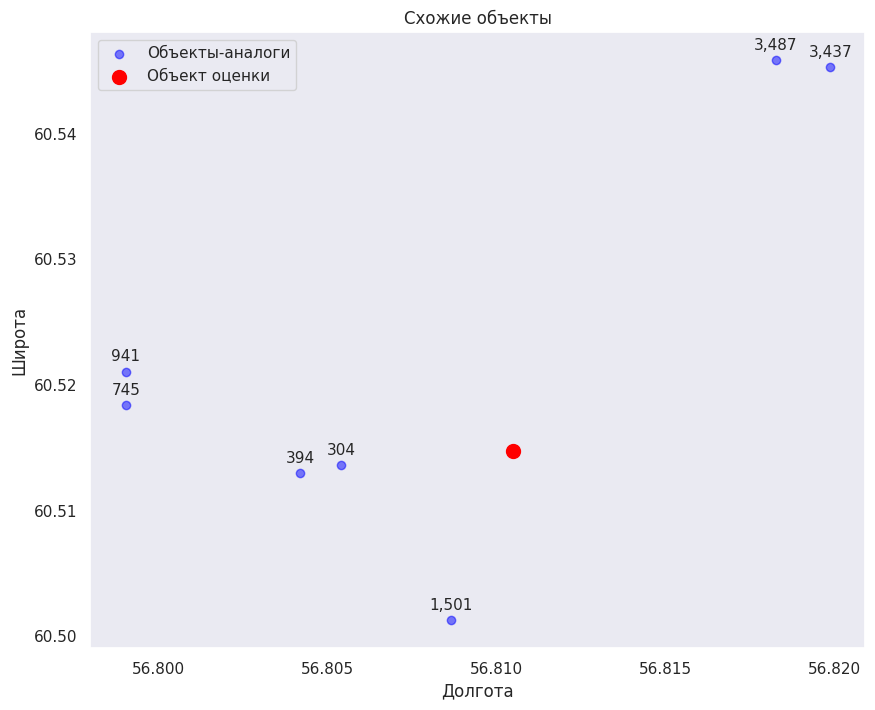

In [95]:
distance = []
n = 0
fontsize = 11

for i in range(len(sim['lat'])):
    distance.append(calculate_distance(df_sample['lat'].loc[n], df_sample['lon'].loc[n], sim['lat'].iloc[i], sim['lon'].iloc[i]))

plt.figure(figsize = (10, 8))
    
# Объекты аналоги
plt.scatter(sim['lon'], sim['lat'], color = 'blue', label = 'Объекты-аналоги', alpha = 0.5)
# Объект из таблицы 1
plt.scatter(df_sample['lon'].loc[n], df_sample['lat'].loc[n], color = 'red', label = 'Объект оценки', s = 100)

for i in range(len(sim['lat'])):
    plt.text(sim['lon'].iloc[i], sim['lat'].iloc[i] + 0.0006, f'{distance[i][0][0]:,.0f}', ha = 'center', va = 'bottom', fontsize = fontsize)

plt.title('Схожие объекты')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.legend()
plt.grid()
plt.show()

# NearestNeighbors

In [99]:
# k-NN с Ball Tree
k = 7  # Количество ближайших соседей
knn = NearestNeighbors(
                       n_neighbors = k, 
                       algorithm = 'ball_tree',
                       metric = 'minkowski'         # metric = 'cosine', 'euclidean', 'minkowski', 'cityblock' (manhattan), 'manhattan', 'haversine' 
                      )
knn.fit(df_sim_scale)

# Поиск похожих квартир (например, для первой квартиры)
distances, indices = knn.kneighbors(df_sim_scale[0].reshape(1, -1))

# print("Показатели для первой квартиры:", df_sample.iloc[0])
# print("Индексы ближайших соседей:", indices[0])
# print("Показатели ближайших соседей:")
# print(df_sample.iloc[indices[0]])
# print("Расстояния до ближайших соседей:", distances[0])

In [104]:
df_sample.loc[0:0]
print(df_sample.loc[0:0]['Адрес_yandex'].values)

['Россия, Свердловская область, Екатеринбург, улица Соболева, 19']


In [105]:
indices[0]

array([   0, 4968,  950, 3391, 2259, 2271, 5855])

In [107]:
sim = df_sample.iloc[indices[0]]
sim

,ОПлощадь,Этаж_1,ГП,Адрес_yandex,Районы_2_enc,ЖК_БД_enc,lat,lon,similar_objects
0,70.3,3,2009.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.514731,56.810482,"[950, 1142, 1386, 2259, 3109, 3391, 4968]"
4968,74.0,2,2013.0,"Россия, Свердловская область, Екатеринбург, ми...",0,0,60.512988,56.804204,"[0, 634, 883, 950, 995, 1142, 1386, 1663, 1823..."
950,65.0,2,2013.0,"Россия, Свердловская область, Екатеринбург, ми...",0,0,60.513617,56.805417,"[0, 634, 635, 703, 883, 981, 1142, 1183, 1663,..."
3391,72.0,4,2014.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.518378,56.799064,"[0, 548, 634, 821, 950, 981, 1289, 1823, 1911,..."
2259,75.0,2,2014.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.521046,56.799039,"[0, 554, 634, 950, 1823, 2083, 2208, 2269, 284..."
2271,63.0,5,2003.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.514865,56.809113,"[4205, 6512]"
5855,63.0,2,2012.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.512629,56.795101,"[170, 635, 703, 883, 950, 981, 1080, 1183, 138..."


In [108]:
sim['Адрес_yandex'].values

array(['Россия, Свердловская область, Екатеринбург, улица Соболева, 19',
       'Россия, Свердловская область, Екатеринбург, микрорайон Широкая Речка, улица Анатолия Муранова, 18',
       'Россия, Свердловская область, Екатеринбург, микрорайон Широкая Речка, улица Анатолия Муранова, 12',
       'Россия, Свердловская область, Екатеринбург, улица Очеретина, 12',
       'Россия, Свердловская область, Екатеринбург, улица Очеретина, 7',
       'Россия, Свердловская область, Екатеринбург, улица Соболева, 21к2',
       'Россия, Свердловская область, Екатеринбург, улица Краснолесья, 155'],
      dtype=object)

In [109]:
from scipy.spatial.distance import cityblock #Для Manhattan distance

# k-NN с KD-деревом и Manhattan distance
k = 7  # Количество ближайших соседей
knn = NearestNeighbors(
                       n_neighbors = k, 
                       algorithm = 'kd_tree', 
                       metric = 'manhattan'       # metric = 'cosine', 'euclidean', 'minkowski', 'cityblock' (manhattan), 'manhattan', 'haversine'
                      )
knn.fit(df_sim_scale)

# Поиск похожих квартир (например, для первой квартиры)
distances, indices = knn.kneighbors(df_sim_scale[0].reshape(1, -1))

# print("Показатели для первой квартиры:", df.iloc[0])
# print("Индексы ближайших соседей:", indices[0])
# print("Показатели ближайших соседей:")
# print(df.iloc[indices[0]])
# print("Расстояния до ближайших соседей (Manhattan):", distances[0])


#Пример использования cityblock для сравнения одной пары:

# квартира1 = scaled_data[0]
# квартира2 = scaled_data[1]

# расстояние_manhattan = cityblock(квартира1, квартира2)
# print(f"Расстояние Manhattan между квартирой 1 и 2: {расстояние_manhattan}")

In [110]:
df_sample.loc[0:0]
print(df_sample.loc[0:0]['Адрес_yandex'].values)

['Россия, Свердловская область, Екатеринбург, улица Соболева, 19']


In [111]:
indices[0]

array([   0, 4968,  950, 3917, 3391, 6550, 5399])

In [112]:
sim = df_sample.iloc[indices[0]]
sim

,ОПлощадь,Этаж_1,ГП,Адрес_yandex,Районы_2_enc,ЖК_БД_enc,lat,lon,similar_objects
0,70.3,3,2009.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.514731,56.810482,"[950, 1142, 1386, 2259, 3109, 3391, 4968]"
4968,74.0,2,2013.0,"Россия, Свердловская область, Екатеринбург, ми...",0,0,60.512988,56.804204,"[0, 634, 883, 950, 995, 1142, 1386, 1663, 1823..."
950,65.0,2,2013.0,"Россия, Свердловская область, Екатеринбург, ми...",0,0,60.513617,56.805417,"[0, 634, 635, 703, 883, 981, 1142, 1183, 1663,..."
3917,88.0,3,2009.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.514731,56.810482,"[452, 995, 3109, 3785, 4376]"
3391,72.0,4,2014.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.518378,56.799064,"[0, 548, 634, 821, 950, 981, 1289, 1823, 1911,..."
6550,61.2,3,2009.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.519689,56.791458,"[170, 324, 635, 660, 703, 950, 981, 1183, 3462..."
5399,60.8,3,2009.0,"Россия, Свердловская область, Екатеринбург, ул...",0,0,60.519689,56.791458,"[170, 324, 635, 660, 703, 950, 981, 1183, 3462..."


In [113]:
sim['Адрес_yandex'].values

array(['Россия, Свердловская область, Екатеринбург, улица Соболева, 19',
       'Россия, Свердловская область, Екатеринбург, микрорайон Широкая Речка, улица Анатолия Муранова, 18',
       'Россия, Свердловская область, Екатеринбург, микрорайон Широкая Речка, улица Анатолия Муранова, 12',
       'Россия, Свердловская область, Екатеринбург, улица Соболева, 19',
       'Россия, Свердловская область, Екатеринбург, улица Очеретина, 12',
       'Россия, Свердловская область, Екатеринбург, улица Вильгельма де Геннина, 33',
       'Россия, Свердловская область, Екатеринбург, улица Вильгельма де Геннина, 33'],
      dtype=object)

In [114]:
distances

array([[0.        , 0.65390837, 0.68199926, 0.72872086, 0.76235211,
        0.89028449, 0.90675276]])